In [ ]:
# Import necessary libraries for data handling and visualization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits


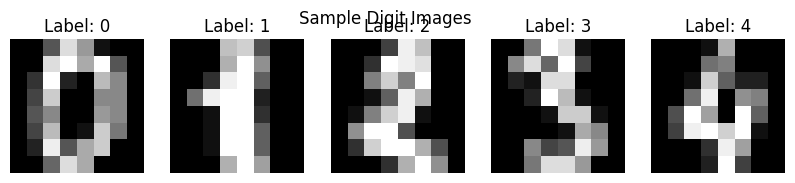

In [2]:

# Load digits dataset
digits = load_digits()
images = digits.images  # shape: (1797, 8, 8)
labels = digits.target

# Display first 5 images
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(images[i], cmap='gray')
    ax.set_title(f"Label: {labels[i]}")
    ax.axis('off')
plt.suptitle("Sample Digit Images")
plt.show()


In [3]:

def svd_compress(image, k):
    # Perform SVD
    U, S, VT = np.linalg.svd(image, full_matrices=False)
    # Reconstruct with top k singular values
    S_k = np.diag(S[:k])
    return U[:, :k] @ S_k @ VT[:k, :]


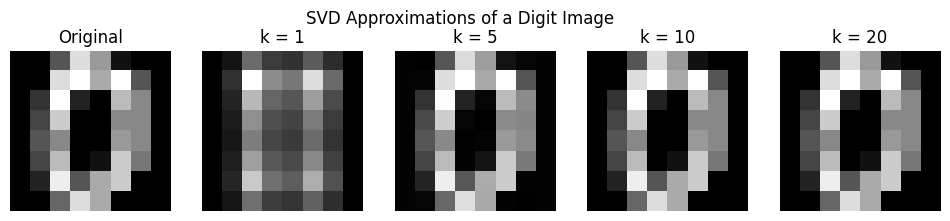

In [4]:

# Choose one digit image
image = images[0]

# Reconstruct with different values of k
ks = [1, 5, 10, 20]
fig, axes = plt.subplots(1, len(ks)+1, figsize=(12, 2.5))

# Original image
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original")
axes[0].axis('off')

# Approximations
for i, k in enumerate(ks):
    approx = svd_compress(image, k)
    axes[i+1].imshow(approx, cmap='gray')
    axes[i+1].set_title(f"k = {k}")
    axes[i+1].axis('off')

plt.suptitle("SVD Approximations of a Digit Image")
plt.show()


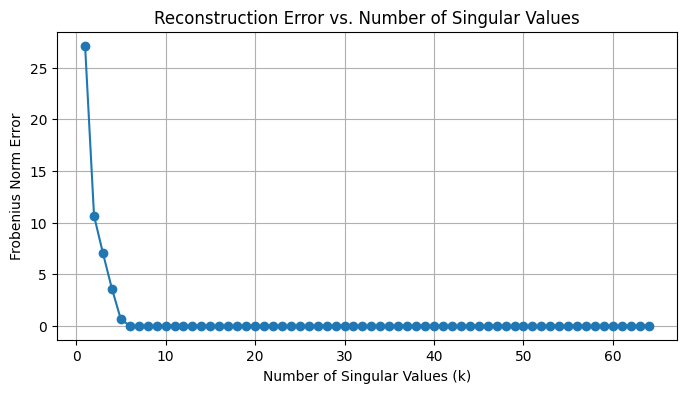

In [5]:

errors = []
ks = list(range(1, 65))  # max rank is 64 for 8x8

for k in ks:
    approx = svd_compress(image, k)
    error = np.linalg.norm(image - approx)
    errors.append(error)

plt.figure(figsize=(8, 4))
plt.plot(ks, errors, marker='o')
plt.title("Reconstruction Error vs. Number of Singular Values")
plt.xlabel("Number of Singular Values (k)")
plt.ylabel("Frobenius Norm Error")
plt.grid(True)
plt.show()
